In [9]:
!pip install catboost

### Catboost

Firstly, we chose the Catboost algorithm, because we've two main issues.
We have a lot of categorical variables and we (most likely) don't have enough data to justify having all of them.
Our first baseline models have had tendency to be overfitted.

Catboost is a way to deal with both of these issues.


#### The model's limitation 
The main issue is the teaching period. The computational complexity of the model is really noticable, especially as we add more features.

The interpretability. Interpreting the individual trees can be difficult. 

#### What to improve? 

More data, most likely?  (meaning diverse data, there is only around 9000 airbnbs)


#### Hyperparameters

As an evaluation metric we've used R2 (because of the need for interepretability). 

We've also used learning rate of 0.282558

And lastly, we've used the standard way for a catboost to handle categorical variables, out of which we've kept 11 (optimal number)

#### Validation Strategy 

Walk-forward validation


#### The most important features

['maximum_nights',
  'new_year',
  'neighbourhood_cleansed',
  'room_type',
  'bathrooms_numeric',
  'amenities_num',
  'host_response_time',
  'ranking',
  'Distance',
  'Verification',
  'last_review',
  'has_availability']}

#### Final Evaluation

R2 = 76%


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 
pd.set_option('display.max_columns',None)
csv_file="C:\\Users\\blank\\DataX---Banger-Team\\Data\\features -1-nodum.csv"


data = pd.read_csv(csv_file)
data1 =pd.read_csv("C:\\Users\\blank\\DataX---Banger-Team\\Data\\features-j-2.csv")
data2 =pd.read_csv("C:\\Users\\blank\\DataX---Banger-Team\\Data\\features_cal_cal.csv")
data3 =pd.read_csv("C:\\Users\\blank\\DataX---Banger-Team\\Data\\features_cal_rev.csv")
merged_df = pd.merge(data2, data1, on='listing_id', how='left')
merged_df = pd.merge(merged_df, data, on='listing_id', how='left')
merged_df = pd.merge(merged_df, data3, on='listing_id', how='left')


In [97]:
merged_df = merged_df.sort_values(by='date', ascending=False)
merged_df

,listing_id,date,price,minimum_nights,maximum_nights,in_season,weekend,new_year,busy,neighbourhood_cleansed,room_type,accommodates,bathrooms_numeric,beds,bathrooms_shared,amenities_num,adjusted_price,host_response_time,host_is_superhost,ranking,Distance,Verification,reviews_per_month,instant_bookable,last_review,has_availability,availability_30,sentiment_score
2142,21614053,2024-09-15,1267.0,2,90,0,1,0,1.000000,Praha 8,Entire home/apt,3,1.0,2.0,0,257,945.0,0.0,f,4.59,5.286659,Both,2.13,t,42.0,t,0,0.622370
6114,659321599997741448,2024-09-15,1690.0,2,365,0,1,0,1.000000,Praha 2,Entire home/apt,3,1.0,2.0,0,756,1300.0,0.0,f,4.33,1.679656,Both,0.41,f,18.0,t,0,0.633449
1935,19480089,2024-09-15,2400.0,1,1125,0,1,0,0.616438,Praha 1,Entire home/apt,3,1.0,2.0,0,682,2200.0,0.0,t,4.92,3.855206,Both,5.50,t,7.0,t,6,0.696647
1161,12420130,2024-09-15,2579.0,2,1125,0,1,0,1.000000,Praha 2,Entire home/apt,6,2.5,6.0,0,216,3193.0,1.0,t,5.00,1.679656,Both,0.07,f,56.0,t,0,0.777992
8529,946374196783265511,2024-09-15,2000.0,1,365,0,1,0,0.983562,Praha 1,Private room,2,1.0,1.0,0,220,2000.0,0.0,f,4.33,488.051471,Both,2.73,t,7.0,t,6,0.528327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,16751211,2023-09-17,1590.0,20,210,0,1,0,0.463014,Praha 2,Entire home/apt,2,1.0,1.0,0,346,1590.0,1.0,t,4.93,1.679656,Both,0.52,f,8.0,t,0,0.657788
7366,852075590248372712,2023-09-17,4789.0,1,100,0,1,0,0.265753,Praha 1,Entire home/apt,12,2.0,12.0,0,743,21023.0,0.0,f,3.83,3.855206,Both,2.73,t,8.0,t,18,0.627754
5775,628174394749908313,2023-09-17,1550.0,2,60,0,1,0,0.701370,Praha 1,Entire home/apt,3,1.0,2.0,0,709,1550.0,0.0,f,4.73,488.051471,Both,2.81,f,7.0,t,3,0.706993
7358,851610674434848085,2023-09-17,3880.0,3,1125,0,1,0,0.093151,Praha 1,Entire home/apt,6,1.0,3.0,0,780,6091.0,0.0,t,5.00,3.855206,Both,3.93,f,8.0,t,8,0.737161


In [98]:
merged_df = merged_df.astype({col: 'str' for col in merged_df.select_dtypes(include='object').columns})
mode_value = merged_df['Verification'].mode()[0]
merged_df['Verification'].fillna(mode_value, inplace=True)
mode_value = merged_df['Distance'].mode()[0]
merged_df['Distance'].fillna(mode_value, inplace=True)
merged_df['sentiment_score'].fillna(0.5, inplace=True)



C:\Users\blank\AppData\Local\Temp\ipykernel_5064\2961200624.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\blank\AppData\Local\Temp\ipykernel_5064\2961200624.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [99]:
categorical_features=["host_is_superhost","Verification","instant_bookable","has_availability","neighbourhood_cleansed","room_type"]

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

columns_to_drop=["listing_id","adjusted_price","date","price"]
x_train = merged_df.iloc[-7000:].drop(columns_to_drop, axis=1)
y_train = merged_df.iloc[-7000:]['price']

x_test = merged_df.drop(x_train.index).drop(columns_to_drop, axis=1)

y_test = merged_df.drop(y_train.index)['price']


In [101]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor(eval_metric='R2',
                              iterations = 190, 
                              cat_features = categorical_features, 
                              random_state = 123
                              )
rfe_dict = regressor.select_features(X = x_train, 
                                     y = y_train, 
                                     eval_set = (x_test,y_test), 
                                     features_for_select = '0-23', 
                                     num_features_to_select = 12, 
                                     steps = 5, 
                                     verbose = 10, #
                                     train_final_model = True, 
                                     plot = True
                                     )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.190343
Step #1 out of 5
0:	learn: 0.0168328	test: 0.0364943	best: 0.0364943 (0)	total: 72.4ms	remaining: 13.7s
10:	learn: 0.3838644	test: 0.0379424	best: 0.0609473 (2)	total: 1.39s	remaining: 22.7s
20:	learn: 0.5507599	test: 0.1710285	best: 0.1800848 (12)	total: 2.15s	remaining: 17.3s
30:	learn: 0.6402073	test: 0.3623858	best: 0.3704209 (29)	total: 2.92s	remaining: 15s
40:	learn: 0.7079486	test: 0.3945089	best: 0.4067481 (38)	total: 3.64s	remaining: 13.2s
50:	learn: 0.7398939	test: 0.4758222	best: 0.4758222 (50)	total: 4.59s	remaining: 12.5s
60:	learn: 0.7659299	test: 0.4347219	best: 0.4760839 (54)	total: 5.71s	remaining: 12.1s
70:	learn: 0.7873793	test: 0.4294483	best: 0.4760839 (54)	total: 6.39s	remaining: 10.7s
80:	learn: 0.8103008	test: 0.4833088	best: 0.4833088 (80)	total: 7.07s	remaining: 9.52s
90:	learn: 0.8426244	test: 0.5304420	best: 0.5426912 (85)	total: 7.69s	remaining: 8.37s
100:	learn: 0.8602363	test: 0.5445647	best: 0.5504016 (91)	total: 8.54s	remai

60:	learn: 0.3017870	test: 0.7144310	best: 0.7176973 (57)	total: 8.42s	remaining: 17.8s
70:	learn: 0.3267926	test: 0.7108772	best: 0.7176973 (57)	total: 11s	remaining: 18.4s
80:	learn: 0.4326740	test: 0.7016329	best: 0.7176973 (57)	total: 17.7s	remaining: 23.8s
90:	learn: 0.4679427	test: 0.6795816	best: 0.7176973 (57)	total: 18.7s	remaining: 20.4s
100:	learn: 0.4778203	test: 0.6792621	best: 0.7176973 (57)	total: 19.6s	remaining: 17.3s
110:	learn: 0.5092888	test: 0.6736994	best: 0.7176973 (57)	total: 20.8s	remaining: 14.8s
120:	learn: 0.5204360	test: 0.6733510	best: 0.7176973 (57)	total: 21.9s	remaining: 12.5s
130:	learn: 0.5411036	test: 0.6943799	best: 0.7176973 (57)	total: 23s	remaining: 10.4s
140:	learn: 0.5668659	test: 0.6909744	best: 0.7176973 (57)	total: 25.4s	remaining: 8.82s
150:	learn: 0.6316878	test: 0.6773333	best: 0.7176973 (57)	total: 26.2s	remaining: 6.76s
160:	learn: 0.6604154	test: 0.6755323	best: 0.7176973 (57)	total: 27.1s	remaining: 4.89s
170:	learn: 0.6871672	test: 0

In [103]:
y_pred = regressor.predict(x_test)

r2_cat = r2_score(y_test, y_pred)
print("R2 on test set:", r2_cat)

R2 on test set: 0.7551568204752718


In [70]:
rfe_dict

{'selected_features': [1, 4, 6, 7, 9, 12, 13, 15, 16, 17, 20, 21],
 'eliminated_features_names': ['reviews_per_month',
  'busy',
  'bathrooms_shared',
  'accommodates',
  'beds',
  'availability_30',
  'sentiment_score',
  'in_season',
  'minimum_nights',
  'weekend',
  'host_is_superhost',
  'instant_bookable'],
 'loss_graph': {'main_indices': [0, 3, 6, 8, 10, 12],
  'removed_features_count': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'loss_values': [12124.30261623468,
   11357.206187599586,
   10987.496446379038,
   10955.86425507279,
   10952.463933566183,
   10948.32109002555,
   10945.17665704305,
   9554.535155845782,
   9223.660145238948,
   9637.273642512422,
   9699.591500314033,
   9323.884942331111,
   9033.165360312054]},
 'eliminated_features': [18, 5, 11, 8, 10, 22, 23, 2, 0, 3, 14, 19],
 'selected_features_names': ['maximum_nights',
  'new_year',
  'neighbourhood_cleansed',
  'room_type',
  'bathrooms_numeric',
  'amenities_num',
  'host_response_time',
  'ranking',
 

### RandomForest

#### Evaluation 

R2 = 40%

In [88]:
columns_to_drop=["listing_id","adjusted_price","date","price"]
import pandas as pd
dummy_df = pd.get_dummies(merged_df, columns=categorical_features)

x_train = dummy_df.iloc[-7000:].drop(columns_to_drop, axis=1)
y_train = dummy_df.iloc[-7000:]['price']

x_test = dummy_df.drop(x_train.index).drop(columns_to_drop, axis=1)

y_test = dummy_df.drop(y_train.index)['price']


In [94]:
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R2: {:.2f}".format(r2))

R2: 0.40


### Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred_linear = linear_regressor.predict(x_test)

r2_linear = r2_score(y_test, y_pred_linear)
print("R2: {:.2f}".format(r2_linear))


R2: 0.03


### XGBoost

In [93]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_regressor.fit(x_train, y_train)
y_pred_xgb = xgb_regressor.predict(x_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R2: {:.2f}".format(r2_xgb))


R2: 0.12


## Comparison

The main strenght of the Catboost is the ability to quickly choose features. Because we had OHE, we couldn't simply use RFE as we did while using Catboost. We would have to manually print features importance and then delete the redundant columns.

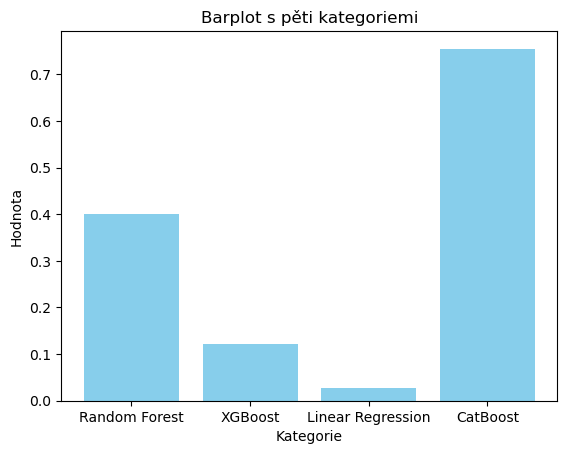

In [109]:
import matplotlib.pyplot as plt

categories = ['Random Forest', 'XGBoost', 'Linear Regression', 'CatBoost']
values = [r2, r2_xgb, r2_linear, r2_cat]

plt.bar(categories, values, color='skyblue')

plt.xlabel('Kategorie')
plt.ylabel('Hodnota')
plt.title('Barplot s pěti kategoriemi')

plt.show()
